You should add this link to your google drive. Click the folder. https://drive.google.com/drive/folders/1kfkDRay1SEMFF8RpV273wtD3hSzUasxx?usp=share_link .In the top right, click Add a shortcut to My Drive.

After finishing the hands on, download your notebook and submit it to the following form: https://docs.google.com/forms/d/1J1kYyho0ROi5CUvUrrR5R_fVil0GMZ-C9Q08kN6b2-c/edit

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_filter_on_img(img,kernel,padding=True):

    out_img=None
    offset = len(kernel) // 2
    if padding == False:
        out_img = np.zeros((img.shape[0] - (len(kernel))+1 ,img.shape[1] - (len(kernel))+1))

    else:
        out_img=np.zeros((img.shape[0],img.shape[1]))
        padded_img= np.zeros((img.shape[0]+len(kernel)-1,img.shape[1]+len(kernel)-1))
        padded_img=np.uint8(padded_img)
        padded_img[offset:padded_img.shape[0]-offset,offset:padded_img.shape[1]-offset]=img
        img=padded_img
    #cv2.imshow('original_img',img)
    #cv2.waitKey(0)

    for x in range(0 , out_img.shape[0]):
        for y in range(0 , out_img.shape[1]):
            acc=0
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    xn=x+a
                    yn=y+b
                    pixel=img[xn,yn]
                    acc+=pixel*kernel[a][b]
            out_img[x,y]=acc
    #out_img=out_img.astype(np.uint8)
    return out_img

In [3]:
def sobel_edge_detection(image, verbose=True):

    #Student code: Apply gaussian filter on image with kernel size 3,3 and sigma 1
    smoothed_image = None

    plt.imshow(smoothed_image, cmap='gray')
    plt.title("Smoothed Image")
    plt.show()

    # Student code: create sobel filer to be used in the x direction
    sobelx = None
    # Student code: apply convolution between the kernel and the smoothed image
    gx = None
    # Student code: create sobel filer to be used in the y direction
    sobely = None
    # Student code: apply convolution between the kernel and the smoothed image
    gy = None

    if verbose:
        plt.imshow(gx, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()

    if verbose:
        plt.imshow(gy, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()

    # Student code: calculate gradient magnitude
    gradient_magnitude = None
    # Student code: normalize gradient magnitude to range between 0 and 255
    normalized_gradient_magnitude = None

    if verbose:
        plt.imshow(normalized_gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()

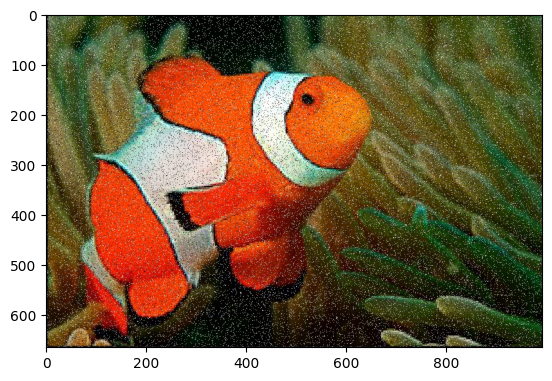

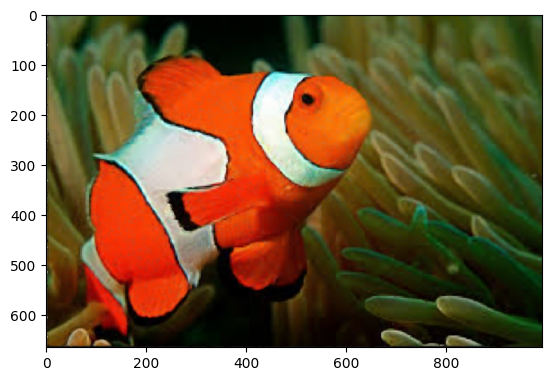

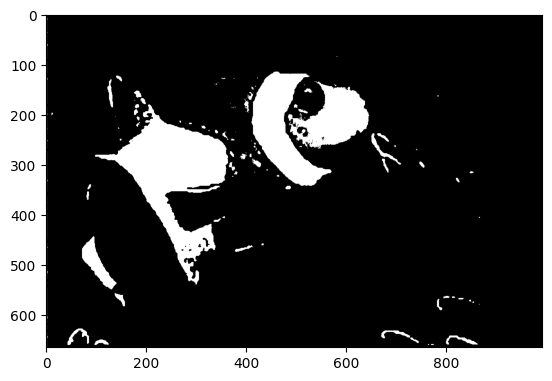

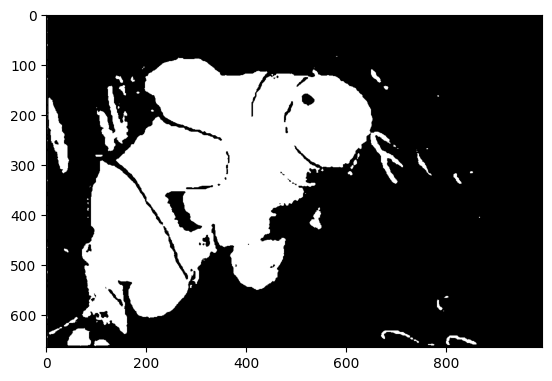

In [23]:
NoisyNemo = cv2.imread("/content/drive/MyDrive/Copy of noisy_nemo.jpg")
NoisyNemo = cv2.cvtColor(NoisyNemo, cv2.COLOR_BGR2RGB)
plt.imshow(NoisyNemo)
plt.show()
# Student Code: apply median filter to remove salt and pepper noise
Nemo = cv2.medianBlur(NoisyNemo, 5)
plt.imshow(Nemo)
plt.show()

# Student Code: convert image to grayscale
GrayNemo = cv2.cvtColor(Nemo,cv2.COLOR_RGB2GRAY)
# Student Code: threshold grayscale image

ret, GraythresholdedNemo = cv2.threshold(GrayNemo, 127, 255, cv2.THRESH_BINARY)
plt.imshow(GraythresholdedNemo,cmap='gray', vmin=0, vmax=255)
plt.show()
# Student Code: Segment Nemo from background in a more effective way using color information
#~ 2 lines of code
image_R=Nemo[:,:,0]
ret, BetterThresholdedImage = cv2.threshold(image_R, 127, 255, cv2.THRESH_BINARY)
#End Student Code
plt.imshow(BetterThresholdedImage,cmap='gray', vmin=0, vmax=255)
plt.show()

In [7]:
def sharpen_img(img,kernel_size=(5,5),sigma=1):
    #Student Code: Apply Gaussian filter on img ~1 line of code
    smoothed_img = cv2.GaussianBlur(img,kernel_size,sigma)
    cv2_imshow(smoothed_img)
    cv2.waitKey(0)

    # Student Code: Subtract Smoothed Image from Original Image to get details/edges
    edges = img-smoothed_img

    plt.imshow(edges, cmap='gray')
    plt.title('edges')
    plt.show()

    # Student Code: Add details to original image
    sharpened = img+edges
    # Student Code: change all negative values of sharpened image to zero
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)

    plt.figure(figsize=(20, 20))
    ax = plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    ax = plt.subplot(1, 2, 2)
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')
    plt.show()
    #cv2.imshow("sharpened img", sharpened)
    #cv2.waitKey(0)

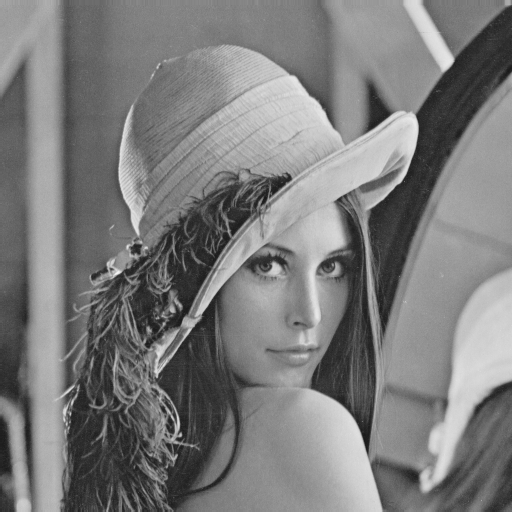

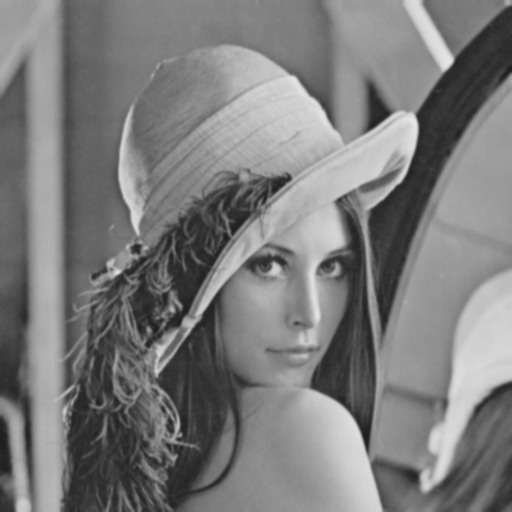

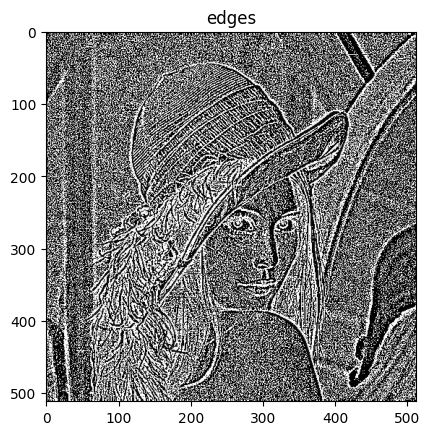

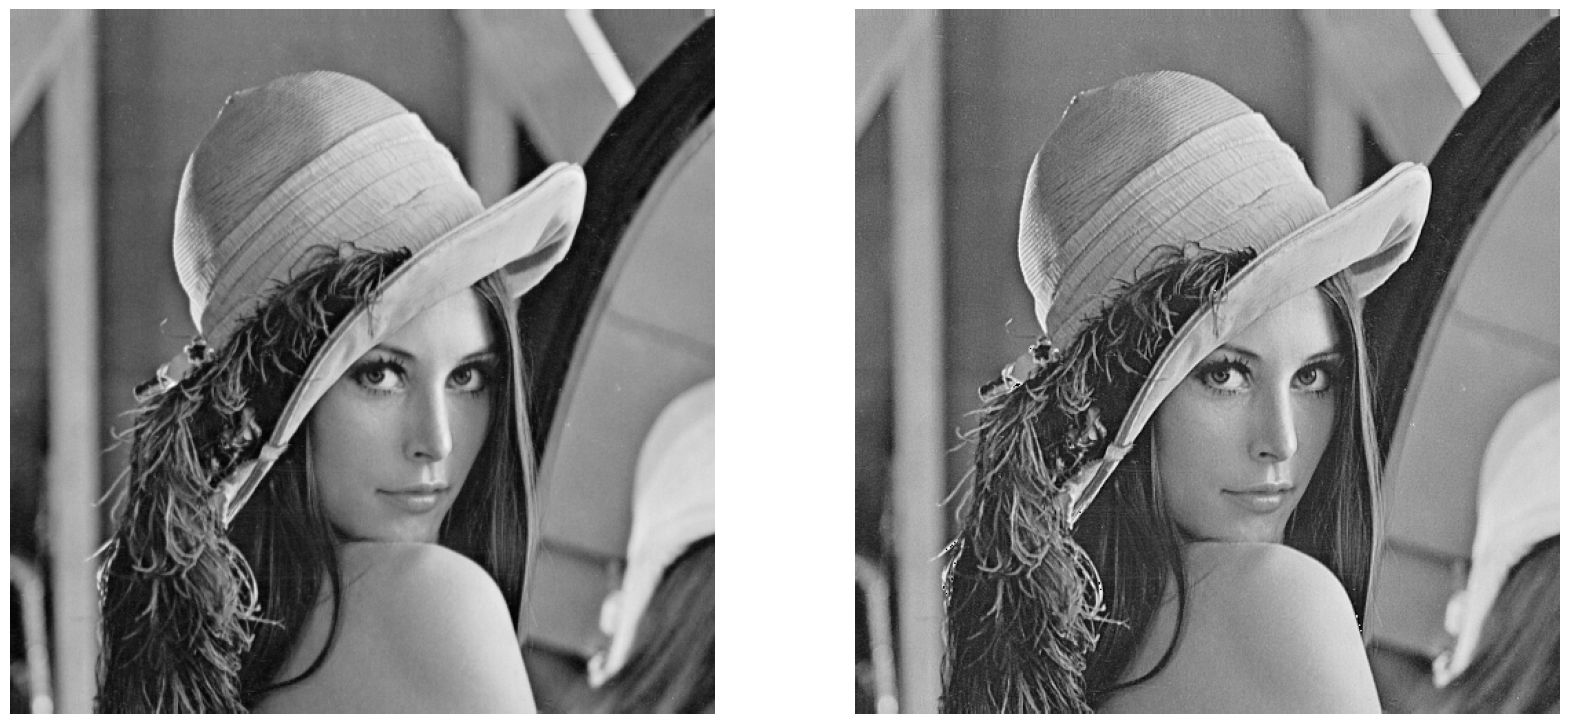

In [8]:
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/Copy of lena.png",0)
cv2_imshow(image)
cv2.waitKey(0)

sharpen_img(image)